In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

In [109]:
df = pd.read_csv('ctr.csv')
df.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Clicks       365 non-null    int64 
 2   Impressions  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [111]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df.set_index('Date', inplace = True)
df.head()

,Clicks,Impressions
Date,,
2022-10-19,2851,58598
2022-10-20,2707,57628
2022-10-21,2246,50135
2022-10-22,1686,40608
2022-10-23,1808,41999


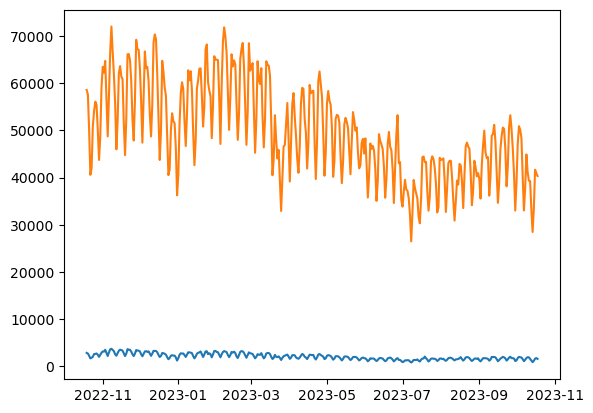

In [97]:
x = df.index
y1 = df['Clicks']
y2 = df['Impressions']

plt.plot(x, y1, y2)
plt.show()

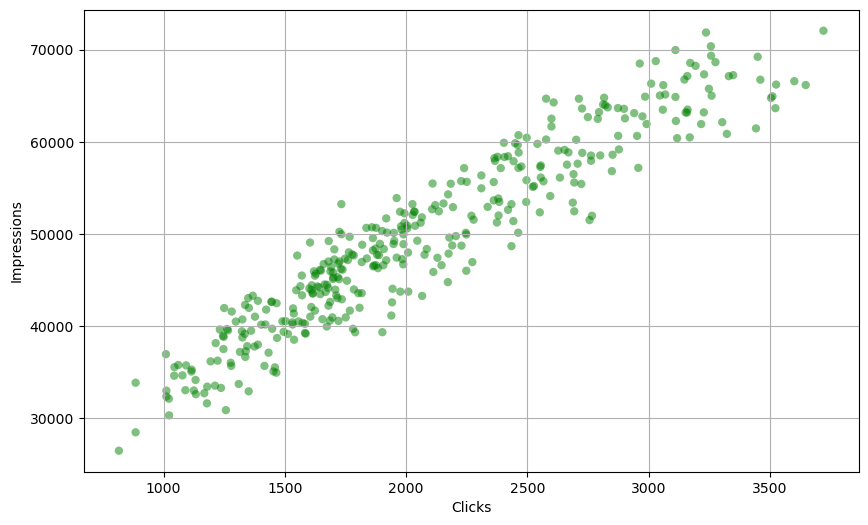

In [112]:
x = df['Clicks']
y = df['Impressions']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, c='g', edgecolors='none')
plt.xlabel('Clicks')
plt.ylabel('Impressions')

plt.grid()
plt.show()

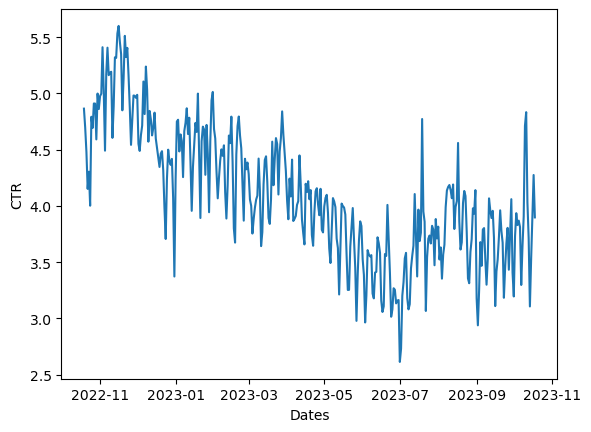

In [113]:
df['CTR'] = (df['Clicks'] / df['Impressions'])*100

x = df.index
y = df['CTR']

plt.plot(x, y)
plt.xlabel('Dates')
plt.ylabel('CTR')

plt.show()


In [114]:
df['DayofWeek'] = df.index.dayofweek
df['WeekofMonth'] = df.index.week // 4 

print(df['DayofWeek'])
print(df['WeekofMonth'])

Date
2022-10-19    2
2022-10-20    3
2022-10-21    4
2022-10-22    5
2022-10-23    6
             ..
2023-10-14    5
2023-10-15    6
2023-10-16    0
2023-10-17    1
2023-10-18    2
Name: DayofWeek, Length: 365, dtype: int64
Date
2022-10-19    10
2022-10-20    10
2022-10-21    10
2022-10-22    10
2022-10-23    10
              ..
2023-10-14    10
2023-10-15    10
2023-10-16    10
2023-10-17    10
2023-10-18    10
Name: WeekofMonth, Length: 365, dtype: int64


/var/folders/kk/l7qpv_zs0q1b1zqj_4frh_dh0000gn/T/ipykernel_13705/3290260509.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekofMonth'] = df.index.week // 4


/var/folders/kk/l7qpv_zs0q1b1zqj_4frh_dh0000gn/T/ipykernel_13705/4293004598.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekOfMonth'] = df.index.week // 4


<BarContainer object of 7 artists>

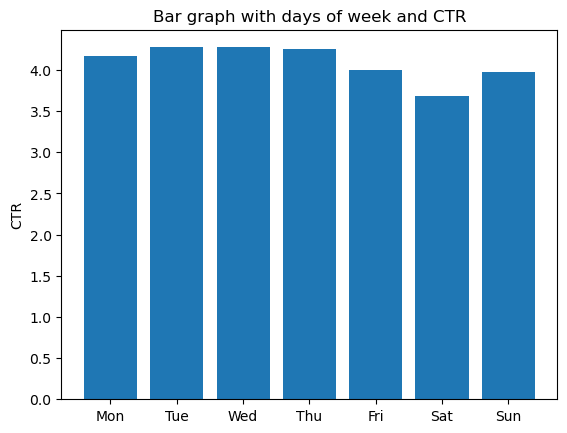

In [115]:
# DAYS OF WEEK

df['DayOfWeek'] = df.index.dayofweek
df['WeekOfMonth'] = df.index.week // 4

# EDA based on DayOfWeek
day_of_week_ctr = df.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

x = day_of_week_ctr['DayOfWeek']
y = day_of_week_ctr['CTR']

plt.title('Bar graph with days of week and CTR')
plt.ylabel('CTR')
plt.bar(x,y)

In [116]:
df.head()

,Clicks,Impressions,CTR,DayofWeek,WeekofMonth,DayOfWeek,WeekOfMonth
Date,,,,,,,
2022-10-19,2851,58598,4.865354,2,10,2,10
2022-10-20,2707,57628,4.697369,3,10,3,10
2022-10-21,2246,50135,4.479904,4,10,4,10
2022-10-22,1686,40608,4.151891,5,10,5,10
2022-10-23,1808,41999,4.304864,6,10,6,10


<BarContainer object of 2 artists>

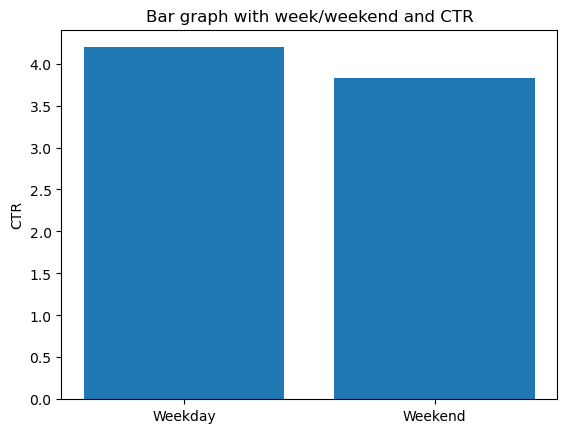

In [117]:
df['daycategory'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
category_based_on_day = df.groupby('daycategory')['CTR'].mean().reset_index()
#df['daycategory'] = ['Weekdays', 'Weekends']

x = category_based_on_day['daycategory']
y = category_based_on_day['CTR']

plt.title('Bar graph with week/weekend and CTR')
plt.ylabel('CTR')
plt.bar(x,y)


/var/folders/kk/l7qpv_zs0q1b1zqj_4frh_dh0000gn/T/ipykernel_13705/546181970.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_data = df.groupby('daycategory')['Clicks','Impressions'].sum().reset_index()


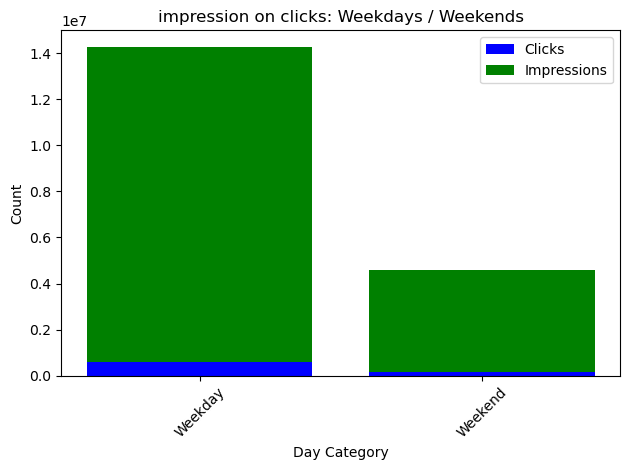

In [118]:
group_data = df.groupby('daycategory')['Clicks','Impressions'].sum().reset_index()

x = group_data['daycategory']
y1 = group_data['Clicks']
y2 = group_data['Impressions']

# Plotting the stacked column chart with specific colors
plt.bar(x, y1, label='Clicks', color='blue')
plt.bar(x, y2, bottom=y1, label='Impressions', color='green')

# Setting labels and title
plt.xlabel('Day Category')
plt.ylabel('Count')
plt.title('impression on clicks: Weekdays / Weekends')

# Adding legend
plt.legend()

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()


/Users/sankarthulasimani/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


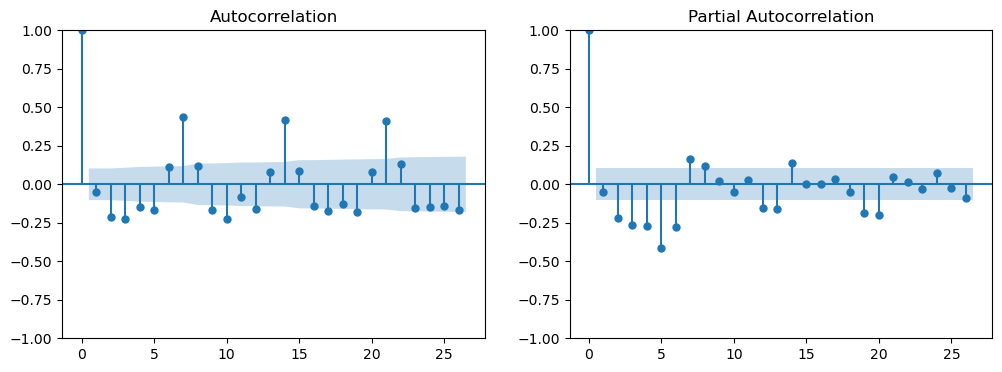

In [119]:
# predictions using SARIMA
df.reset_index(inplace = True)
#df.head()

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


time_series = df.set_index('Date')['CTR']

differenced_series = time_series.diff().dropna()

fig, axes = plt.subplots(1, 2, figsize = (12,4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1,1,1,12

model = SARIMAX(time_series, order =(p, d, q), seasonal_order = (p, d, q, s))
results = model.fit()
print(results.summary())

/Users/sankarthulasimani/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sankarthulasimani/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41935D-01    |proj g|=  7.75846D-01

At iterate    5    f=  2.18007D-01    |proj g|=  3.39639D-01

At iterate   10    f=  2.01680D-01    |proj g|=  9.23321D-02

At iterate   15    f=  1.96440D-01    |proj g|=  2.65009D-02

At iterate   20    f=  1.96372D-01    |proj g|=  1.20109D-02

At iterate   25    f=  1.95766D-01    |proj g|=  9.82582D-03

At iterate   30    f=  1.95565D-01    |proj g|=  2.47417D-03

At iterate   35    f=  1.95522D-01    |proj g|=  9.76462D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [121]:
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852389
2023-10-20    3.889417
2023-10-21    3.820202
2023-10-22    3.727357
2023-10-23    3.710221
                ...   
2024-01-22    3.545602
2024-01-23    3.466678
2024-01-24    3.561219
2024-01-25    3.546716
2024-01-26    3.580170
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


            Original  Predictions
2022-10-19  4.865354          NaN
2022-10-20  4.697369          NaN
2022-10-21  4.479904          NaN
2022-10-22  4.151891          NaN
2022-10-23  4.304864          NaN
...              ...          ...
2024-01-22       NaN     3.545602
2024-01-23       NaN     3.466678
2024-01-24       NaN     3.561219
2024-01-25       NaN     3.546716
2024-01-26       NaN     3.580170

[465 rows x 2 columns]


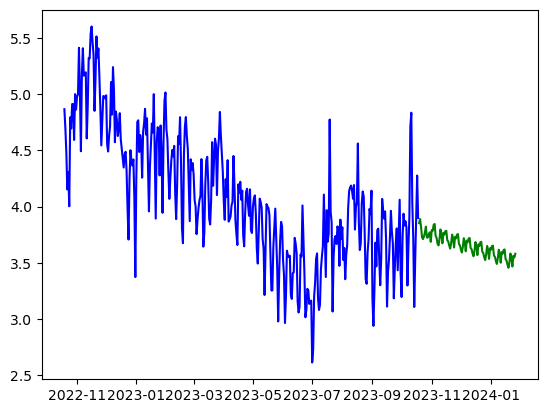

In [138]:
forecast = pd.DataFrame({'Original':time_series, 'Predictions':predictions})
print(forecast)
x = forecast.index
y1 = forecast['Original']
y2 = forecast['Predictions']

plt.plot(x, y1, color = 'blue')
plt.plot(x, y2, color = 'green')
plt.show()